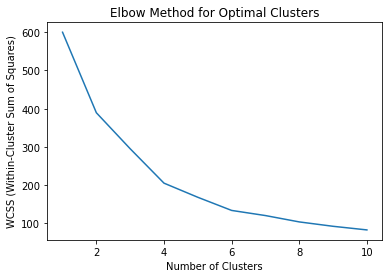

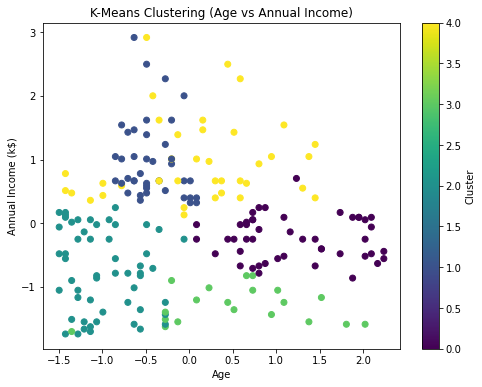

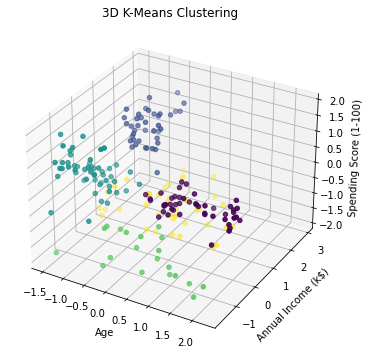

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


df = pd.read_csv('Mall_Customers.csv')


X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


X = X.dropna()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


wcss = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


optimal_k = 5


kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


df['Cluster'] = y_kmeans


plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-Means Clustering (Age vs Annual Income)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.colorbar(label='Cluster')
plt.show()


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_kmeans, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D K-Means Clustering')
plt.show()


print(df.head())


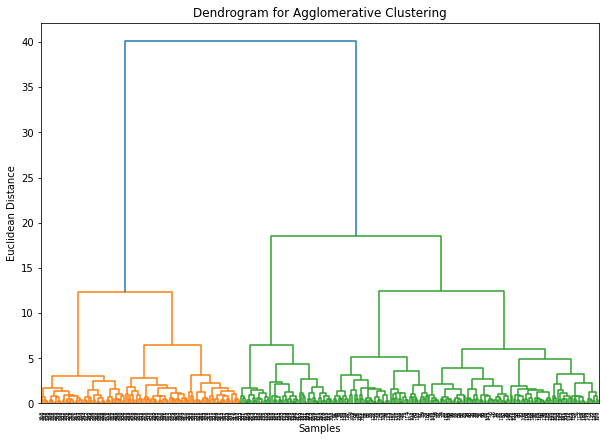

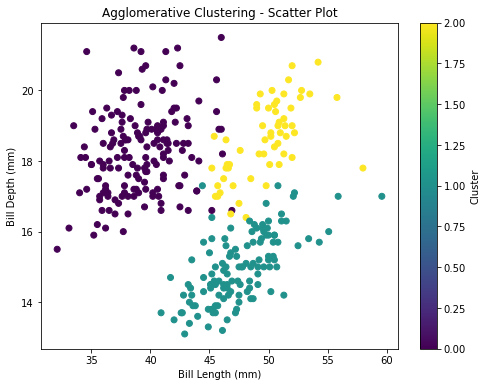

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('penguins.csv')


imputer = SimpleImputer(strategy='mean')
df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = imputer.fit_transform(
    df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
)


label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])


X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


linked = linkage(X_scaled, method='ward')


plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()




agglom = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters = agglom.fit_predict(X_scaled)


plt.figure(figsize=(8, 6))
plt.scatter(df['bill_length_mm'], df['bill_depth_mm'], c=clusters, cmap='viridis', label='Clusters')
plt.title('Agglomerative Clustering - Scatter Plot')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.colorbar(label='Cluster')
plt.show()
